In [1]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import ReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from os import listdir
from numpy import asarray
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

In [3]:
from keras.layers import Lambda

# define the discriminator model
def define_denoise(image_shape):
	# weight initialization
    init = RandomNormal(stddev=0.02)
	# source image input
    in_src_image = Input(shape=image_shape)
	# L1
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(in_src_image)
    d = ReLU()(d)
	# L2
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L3
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L4
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L5
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L6
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L7
    d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    #L8
    d = Conv2D(3, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
    d = ReLU()(d)
    
    result = Lambda(lambda inputs: inputs[0] / inputs[1])([in_src_image, d])
    
    d = Activation('tanh')(result)

#     d = Activation('tanh')(d)
	
	# define model
    model = Model(in_src_image, d)
	# compile model
    opt = Adam()
    model.compile(loss=euclidean_distance_loss, optimizer=opt)
    return model

In [4]:
model = define_denoise((256,256,3))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 256, 256, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       re_lu_1[0][0]                    
____________________________________________________________________________________________

In [5]:
# import numpy as np

# def get_images(batch_size):
    
#     #select SAR image
#     path = 'dog/dog_train/'
#     files = listdir(path)
#     files_len = len(files)
# #     print(files_len)
#     rint3 = np.random.randint(0, files_len, batch_size)
# #     print(rint3)
#     files_arr = np.array(files)
#     lvl3 = files_arr[rint3]
# #     print(lvl3)
    
#     #select RGB image
#     def rgb2gray(rgb):
#         return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#     noise = np.random.normal(0, 0.45, (256,256,3))
    
#     img = load_img(path + lvl3[0])
#     img = img_to_array(img)
#     img = (img - 127.5) / 127.5
#     img2 = img+noise
#     gray1 = rgb2gray(img)
#     gray1 = np.stack((gray1,)*3, axis=-1)
#     gray2 = rgb2gray(img2)
#     gray2 = np.stack((gray2,)*3, axis=-1)
# #     plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
# #     plt.show()
    
#     #load images
#     img_noise=[]
#     img_gray=[]
    
#     img_gray.append(gray1)
#     img_noise.append(gray2)
#     img_gray = np.array(img_gray)
#     img_noise = np.array(img_noise)
    
#     return img_gray, img_noise

In [6]:
# satellite run
import numpy as np

def get_images(batch_size):
    
    #select SAR image
    s1_path = 'munich/train/s1/'
    files = listdir(s1_path)
    files_len = len(files)
#     print(files_len)
    rint3 = np.random.randint(0, files_len, batch_size)
#     print(rint3)
    files_arr = np.array(files)
    lvl3 = files_arr[rint3]
#     print(lvl3)
    
    #select RGB image
    lvl3_opt = lvl3.tolist()
    temp3 = [sub.replace('_s1_', '_s2_') for sub in lvl3_opt]
#     print(temp3)
    s2_path = 'munich/train/s2/'
    
    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    
    #load images
    img_sar=[]
    img_opt=[]
    for i in range(batch_size):
        img = load_img(s1_path + lvl3[i])
        img = img_to_array(img)
        img = (img - 127.5) / 127.5
        img_sar.append(img)
        img = load_img(s2_path + temp3[i])
        img = img_to_array(img)
        img = (img - 127.5) / 127.5
        gray = rgb2gray(img)
        gray = np.stack((gray,)*3, axis=-1)
        img_opt.append(gray)
        
    img_sar = np.array(img_sar)
    img_opt = np.array(img_opt)
#     img_sar = (img_sar - 127.5) / 127.5
#     img_opt = (img_opt - 127.5) / 127.5
    
    return img_opt, img_sar

In [7]:
x1, x2 = get_images(1)

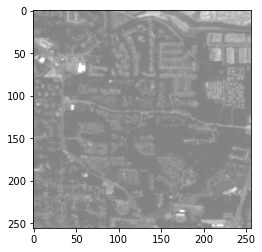

In [9]:
x1 = (x1 + 1)/2.0
plt.imshow(x1[0])

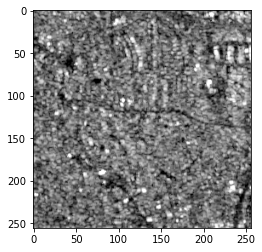

In [10]:
x2 = (x2 + 1)/2.0 
plt.imshow(x2[0])

In [11]:
def summarize_performance(step, model):
    
    gray, noise = get_images(1)
    
    clean = model.predict(noise)
    
    gray = (gray + 1) / 2.0
    noise = (noise + 1) / 2.0
    clean = (clean + 1) / 2.0
    
    plt.figure(figsize=(10.1,3.45))
    
    plt.subplot(131)
    plt.axis('off')
    plt.imshow(noise[0])
    
    plt.subplot(132)
    plt.axis('off')
    plt.imshow(clean[0])
    
    plt.subplot(133)
    plt.axis('off')
    plt.imshow(gray[0])
    
    filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(filename1)
    plt.close()
    
    filename2 = 'model_%06d.h5' % (step+1)
    model.save(filename2)
    
    print('>Saved: %s and %s' % (filename1, filename2))

In [12]:
def train(model, batch_size, n_images, n_epochs=5):
    
    bat_per_epo = int(n_images / batch_size)
    n_steps = bat_per_epo * n_epochs
    
    for i in range(n_steps):
    
        gray, noise = get_images(1)

        loss = model.train_on_batch(noise, gray)
        
        if((i+1)%150==0):
            print('>%d, loss[%.3f]' % (i+1, loss))
            
        if((i+1)%300==0):
            summarize_performance(i, model)

In [13]:
image_shape = (256, 256, 3)
#number of images
n_images = 1200

model = define_denoise(image_shape)

train(model, 1, n_images)

>150, loss[0.769]
>300, loss[1.057]
>Saved: plot_000300.png and model_000300.h5
>450, loss[0.771]
>600, loss[0.773]
>Saved: plot_000600.png and model_000600.h5
>750, loss[0.740]
>900, loss[0.705]
>Saved: plot_000900.png and model_000900.h5
>1050, loss[0.736]
>1200, loss[0.892]
>Saved: plot_001200.png and model_001200.h5
>1350, loss[0.914]
>1500, loss[0.770]
>Saved: plot_001500.png and model_001500.h5
>1650, loss[0.767]
>1800, loss[0.831]
>Saved: plot_001800.png and model_001800.h5
>1950, loss[0.797]
>2100, loss[0.668]
>Saved: plot_002100.png and model_002100.h5
>2250, loss[0.771]
>2400, loss[0.680]
>Saved: plot_002400.png and model_002400.h5
>2550, loss[0.857]
>2700, loss[0.677]
>Saved: plot_002700.png and model_002700.h5
>2850, loss[0.756]
>3000, loss[1.132]
>Saved: plot_003000.png and model_003000.h5
>3150, loss[0.719]
>3300, loss[0.709]
>Saved: plot_003300.png and model_003300.h5
>3450, loss[0.702]
>3600, loss[0.715]
>Saved: plot_003600.png and model_003600.h5
>3750, loss[0.781]
>39